# Load Libraries

In [2]:
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid', context = 'notebook') #optional

from sklearn import datasets

# Load Dataset (Iris)
Dataset bunga iris adalah salah satu dataset bersejarah yang paling terkenal, banyak ditemukan di buku dan publikasi, karena datanya yang berguna untuk problem klasifikasi dan regresi.
Dataset iris (https://archive.ics.uci.edu/ml/datasets/Iris) berisikan 50 catatan untuk masing-masing dari tiga jenis bunga Iris, 150 baris dari total lima kolom. Setiap baris adalah hasil pengukuran berikut:

Panjang kelopak daun (Sepal) dalam cm  
Lebar Sepal dalam cm  
Panjang mahkota bunga (Petal) dalam cm  
Lebar Petal dalam cm

Kolom terakhir adalah tipe bunga (setosa, versicolor, atau virginica).

In [3]:
iris = sns.load_dataset('iris')

Untuk memahami depedensi antar variabel, kita gunakan operasi covariance: 

In [4]:
def covariance(X, Y):
    xhat    = np.mean(X)
    yhat    = np.mean(Y)
    epsilon = 0

    for x,y in zip(X, Y):
        epsilon = epsilon + (x - xhat) * (y - yhat)

    return epsilon / (len(X) - 1)

In [5]:
# Contoh penggunaan
print(covariance([1, 1, 4, 3], [1, 0, 2, 2]))

1.25


Operasi correlation:

In [6]:
def correlation (X, Y):
    return (covariance(X, Y) / (np.std(X, ddof = 1) * np.std(Y, ddof = 1))) # ddof = 1 agar pembagi untuk std adalah N - 1

Contoh penggunaan:

In [7]:
print(correlation([1, 1, 4, 3], [1, 0, 2, 2]))

0.8703882797784892


## Mendapatkan intuisi dengan tampilan visual menggunakan Seaborn pairplot.

Seaborn dapat digunakan untuk mendapatkan representasi grafis dari semua kombinasi variabel yang mungkin.
Fungsi pairplot Seaborn adalah membuat ringkasan grafis yang sangat lengkap dari semua pasangan variabel, direpresentasikan sebagai scatterplots, dan representasi dari distribusi untuk matriks diagonal, untuk mencari hubungan antar variabel.

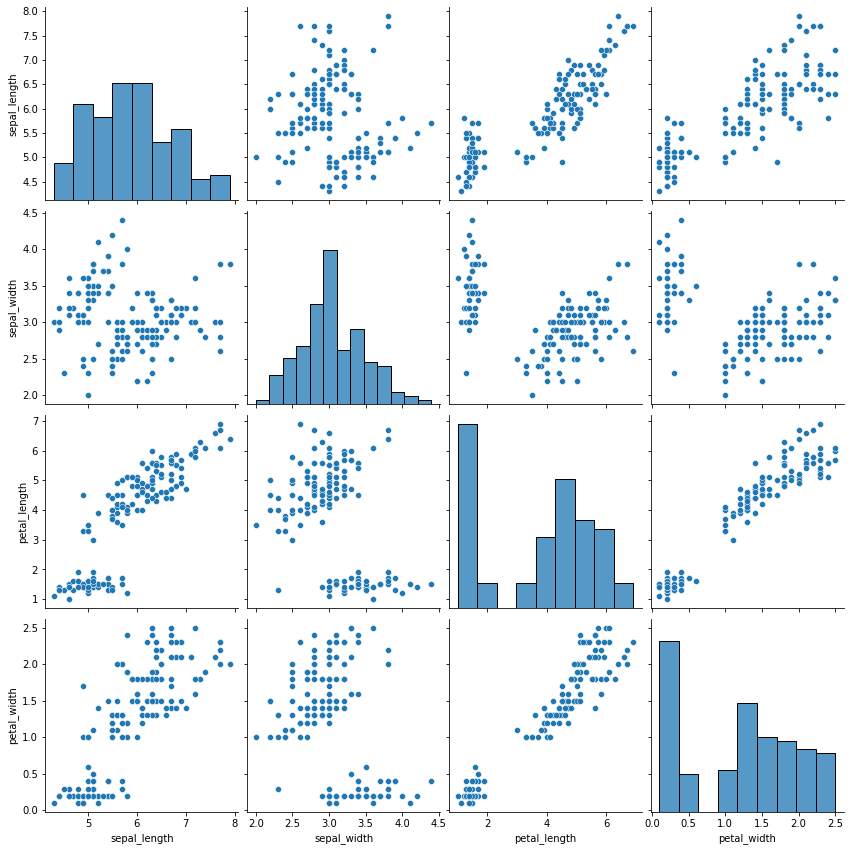

In [8]:
sns.pairplot(iris, height = 3.0)

Untuk analisis awal, kita ambil nilai petal_width dan petal_length yang memiliki hubungan linear

In [9]:
X = iris['petal_width'].values # gunakan .values untuk mendapatkan bentuk numpy array
Y = iris['petal_length'].values

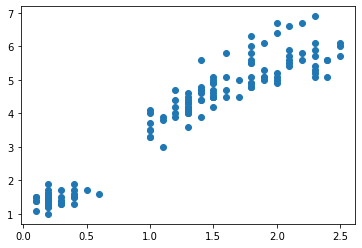

In [10]:
plt.scatter(X, Y)

# Mengimplementasikan Metode Correlation untuk Mencari Parameter dari Regresi

In [11]:
def correlation_fit(x, y):
    beta  = correlation(x, y) * np.std(y, ddof = 1) / np.std(x, ddof = 1) #Slope
    alpha = np.mean(y) - beta * np.mean(x) #Intercept
    
    return alpha, beta

In [12]:
alpha, beta = correlation_fit(X, Y)

print(alpha)
print(beta)

1.0835580328505117
2.2299404951218635


Tampilkan grafik garis regresi dengan datanya.

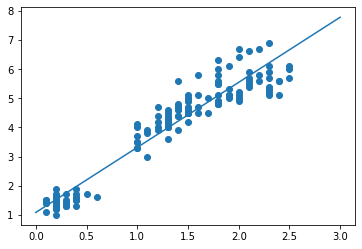

In [13]:
# tampilkan scatter datanya
plt.scatter(X, Y)

# generate garis linear dari nilai alpha dan beta yang diperoleh
xr = np.arange(0, 3.5)
yr = (xr * beta) + alpha

plt.plot(xr, yr)

# Prediksi dan kesalahan (error) dari hasil prediksi

Model dari data kita adalah dalam bentuk persamaan linear $\hat{y} = w_0 + w_1 x$

In [14]:
def predict(w0, w1, x):
    return w0 + w1 * x

## Error

- Permasalahan: garis hasil prediksi tidak _fit_ ke data secara tepat.
- Kita dapat **mentoleransi** error sebesar $\varepsilon$
- Untuk pasangan data $(x_i, y_i)$, errornya dapat ditulis sebagai:

$$
\varepsilon_i = y_i - (w_0 + w_1 x_i)
$$

- Atau secara umum dapat ditulis sebagai:

$$
\varepsilon_i = y_i - \hat{y_i}
$$

dimana $\hat{y_i}$ adalah nilai prediksi dari $y_i$

---
## Cost Function

Dari fungsi error diatas, kita dapat memperoleh nilai "error" atau $\varepsilon$ dari tiap-tiap data point terhadap nilai dari regresinya. Namun bagaimana cara agar kita tahu bahwa model regresi yang di _fit_ sudah baik **secara keseluruhan**? 

Cara paling sederhana adalah jumlahkan semua error sehingga akan kita dapatkan representasi error secara keseluruhan. Namun, nilai dari $\varepsilon_i$ beragam dari nilai positif dan negatif, sehingga ada kemungkinan bahwa walaupun nilai dari masing-masing error besar, namun bisa saling menghilangkan satu sama lain. Maka, cara yang bisa dilakukan agar tidak ada nilai negatif adalah:
- Jumlahkan nilai absolut error (sum of absolute error)  
Persamaan matematis:  
$$
SAE = \sum_{i=1}^{n_{samp}} |\varepsilon_i| = \sum_{i=1}^{n_{samp}} |y_i - \hat{y_i}|
$$
- Jumlahkan nilai kuadrat dari error (sum of squared error)  
Persamaan matematis:  
$$
SSE = \sum_{i=1}^{n_{samp}} \varepsilon_i^2 = \sum_{i=1}^{n_{samp}} (y_i - \hat{y_i})^2
$$

In [15]:
# Membuat fungsi SAE dengan python:
def sae(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred))

In [16]:
# Membuat fungsi SSE dengan python:
def sse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

Jika kita membandingkan performa kesalahan prediksi suatu algoritma untuk dataset antara 1 juta data point dan 1000 data point, maka kemungkinan besar akan kita dapatkan jumlah kesalahan yang besar untuk dataset berjumlah 1 juta data point. Oleh karena itu, akan lebih adil jika kita menilai nilai rataan dari keseluruhan error. Maka pengukuran performa dapat dilakukan dengan menggunakan Mean of Absolut Error (MAE) atau Mean of Squared Error (MSE) sebagai berikut: 

$$
MAE = \frac{\sum_{i=1}^{n_{samp}} |\varepsilon_i|}{n_{samp}} = \frac{\sum_{i=1}^{n_{samp}} |y_i - \hat{y_i}|}{n_{samp}} = \frac{SAE}{n_{samp}}
$$

$$
MSE = \frac{\sum_{i=1}^{n_{samp}} \varepsilon_i^2}{n_{samp}} = \frac{\sum_{i=1}^{n_{samp}} (y_i - \hat{y_i})^2}{n_{samp}} = \frac{SSE}{n_{samp}}
$$

Karena MSE memiliki nilai kuadrat dari satuan unit error, maka tidak bisa digunakan untuk dibandingkan dengan satuan unit MAE. Maka kita juga bisa gunakan nilai akar dari MSE, atau Root MSE (RMSE) sebagai berikut sebagai salah satu metriks ukuran performa:
$$
RMSE = \sqrt{MSE}
$$


# Bonus - hanya jika waktu cukup, jika tidak coba di rumah


### Polynomial Basis Functions

Transformasi dengan fungsi basis polinomial mentransformasikan data sehingga model OLS tetap dapat bekerja dengan baik. Untuk memudahkan visualisasi, sementara waktu kita akan melihat data yang lebih mudah untuk ditransformasi. Agar lebih mudah terlihat, kita gunakan satu prediktor yang memiliki hubungan kubikal dengan variabel yang ingin kita prediksi. Di bawah ini disertakan data dan model OLS yang langsung diterapkan pada data yang ada.

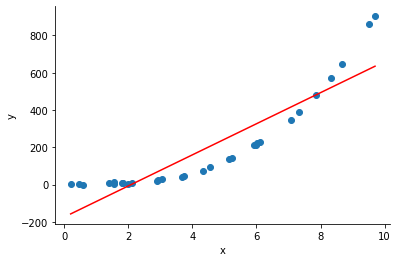

In [21]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)

n = 30
x = np.random.random(n) * 10
y = x**3 + 5 * np.random.randn(n)

x_1col = x.reshape(-1,1)
reg    = LinearRegression()

reg.fit(x_1col, y)

xfit = np.linspace(x.min(), x.max())
yfit = reg.predict(xfit.reshape(-1, 1))

ax = plt.gca()
plt.scatter(x, y, marker = 'o')
plt.plot(xfit, yfit, c = 'red')
plt.xlabel('x')
plt.ylabel('y')
sns.despine()

Mentransformasi nilai $x$ menjadi $x^3$ pada contoh di bawah membantu kita melihat secara visual bahwa sekarang hubungannya kembali linear!

*Catatan: Perhatikan label sumbu x-nya!*

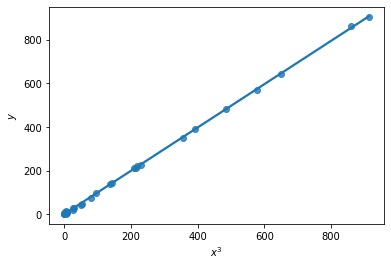

In [20]:
np.random.seed(42)

n = 30
x = np.random.random(n) * 10
y = x**3 + 5 * np.random.randn(n) # kita seringnya tidak tahu relasi ini dalam dunia nyata

ax = plt.gca()
sns.regplot(x = x**3, y = y, ci = False, ax = ax)
plt.xlabel('$x^3$')
plt.ylabel('$y$');

Berdasarkan contoh di atas, kita dapat mentransformasikan data agar model dapat mengenali pola dengan baik.

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
colors = sns.color_palette()

x = np.random.random(25) * 2 * np.pi
y = np.sin(x) + np.random.randn(25) * 0.05

def draw_poly(order = 2, ax = None, regressor = LinearRegression(fit_intercept = False), c = 'r', label = None):
    pipe    = make_pipeline(PolynomialFeatures(order), regressor)
    support = np.linspace(0, 2 * np.pi)
    
    pipe.fit(x.reshape(-1, 1), y)
    
    y_pred = pipe.predict(support.reshape(-1, 1))

    if ax:
        ax.plot(support, y_pred, c = c, label = label)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        sns.despine()

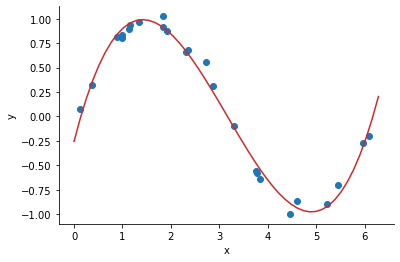

In [25]:
ax = plt.gca()
ax.scatter(x, y, marker = 'o')

# Menggambar hasil prediksi dengan orde 3
draw_poly(3, ax = ax, c = colors[3]);

### Tugas
1. Bagi dataset iris menjadi data latih dan data uji dengan rasio 80:20, random_state=0
2. Gunakan data latih untuk mendapatkan nilai parameter alpha dan beta
3. Gunakan nilai parameter alpha dan beta tersebut untuk prediksi data uji
4. Hitung SAE, SSE, MAE, MSE, dan RMSE dari hasil prediksi data uji terhadap data uji sebenarnya

In [ ]:
# 1. Bagi dataset iris menjadi data latih dan data uji dengan rasio 80:20


In [ ]:
# 2. Gunakan data latih untuk mendapatkan nilai parameter alpha dan beta


In [ ]:
# 3. Gunakan nilai parameter alpha dan beta tersebut untuk prediksi data uji
# perhatikan bahwa alpha = y_intercept = w0, beta = slope = w1


In [ ]:
# 4. Hitung SAE, SSE, MAE, MSE, dan RMSE dari hasil prediksi data uji terhadap data uji sebenarnya

In [ ]:
# SAE


In [ ]:
# SSE


In [ ]:
# MAE


In [ ]:
# MSE


In [ ]:
# RMSE


## Tugas tambahan jika ada waktu, atau pekerjaan rumah, sebagai pelengkap laporan akhir

1. Dari hasil di atas, analisis mengapa sae > sse atau sae < sse berdasarkan distribusi error (y_true-y_pred). Lengkapi dengan visualisasi !
2. Gunakan library sklearn: LinearRegression. Hitung score performanya.
3. Metrik apa yang digunakan di library sklearn: LinearRegression ? Jelaskan tentang metrik tersebut !  
[ Hint: baca dokumentasi sklearn.linear_model.LinearRegression ]
4. Bandingkan No.2 dengan hasil perhitungan di atas

In [ ]:
# 1. Dari hasil di atas, analisis mengapa sae > sse atau sae < sse berdasarkan distribusi error (y_true-y_pred). 
#    Lengkapi dengan visualisasi !



In [ ]:
# 2. Gunakan library sklearn: LinearRegression. Hitung score performanya.


In [ ]:
# 3. Metrik apa yang digunakan di library sklearn: LinearRegression ? Jelaskan tentang metrik tersebut !  
# [ Hint: baca dokumentasi sklearn.linear_model.LinearRegression ]

In [ ]:
# 4. Bandingkan No.2 dengan hasil perhitungan di atas

# Laporan Akhir

- Cari dataset lain. Lakukan pre-processing data jika diperlukan, untuk mendapatkan hubungan linear antara input dan output, serta mengambil 1 fitur saja. 
- Tuliskan sumber dataset yang anda pakai disini
- Jelaskan secara singkat mengenai isi dari dataset tersebut
- Gunakan konsep correlation untuk mendapatkan parameter $\alpha$ dan $\beta$ 
- Gunakan parameter tersebut untuk melakukan prediksi
- Hitung SAE, SSE, MAE, MSE, dan RMSE dari hasil prediksi
- Tulis kesimpulan

Note : Mohon untuk memberikan keterangan dari setiap kolom kode yang dijalankan pada file .ipynb
